In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Load Data
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")
trainTarget = train.loc[:, "satisfaction"]
testTarget = test.loc[:, "satisfaction"]

# Make dummy features
trainDummy = pd.get_dummies(train[["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]])
trainDummy = train.merge(trainDummy, left_index=True, right_index=True)

testDummy = pd.get_dummies(test[["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]])
testDummy = test.merge(testDummy, left_index=True, right_index=True)

# correlation of all variables
corrMatrix = trainDummy.corr()
# sn.set(rc = {"figure.figsize":(20, 20)})
# sn.heatmap(corrMatrix, annot=True)
# plt.show()

# Select important variables
thresCorr = 0.25  # Decide the threshold of correlation to be important
filt = corrMatrix["satisfaction_satisfied"] >= thresCorr
importantVariables = corrMatrix.columns[filt]
trainFil = trainDummy.loc[:, importantVariables]  # Training data which contains only important variables
testFil = testDummy.loc[:, importantVariables]  # Testing data which contains only important variables

print(importantVariables)

Index(['Flight Distance', 'Inflight wifi service', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Cleanliness', 'Type of Travel_Business travel',
       'Class_Business', 'satisfaction_satisfied'],
      dtype='object')


### Distance Threshold - KNeighbors - Accuracy

In [ ]:
from sklearn import preprocessing as pre
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

thresD = dict()
for d in range(500, 4000, 500):
    print(d)
    trainFilCopy = trainFil.copy()
    testFilCopy = testFil.copy()

    # Binarize flight distance on different threshold
    dist = trainFilCopy.loc[:, "Flight Distance"]
    binarizer = pre.Binarizer(threshold=d)
    distBi = binarizer.transform([dist]).T
    trainFilCopy.loc[:, "Flight Distance"] = distBi

    dist = testFilCopy.loc[:, "Flight Distance"]
    binarizer = pre.Binarizer(threshold=d)
    distBi = binarizer.transform([dist]).T
    testFilCopy.loc[:, "Flight Distance"] = distBi

    # KNeighborsClassifier
    kNeighbor = []
    accTrend = []
    for n in range(1, 51):
        print(n)
        knn = KNeighborsClassifier(n_neighbors=n).fit(trainFilCopy, trainTarget)
        pred = knn.predict(testFilCopy)
        eva = classification_report(y_true=testTarget, y_pred=pred, output_dict=True)
        kNeighbor.append(n)
        accTrend.append(eva["accuracy"])

    dictn = {"x":kNeighbor, "y":accTrend}
    thresD[str(d)] = dictn

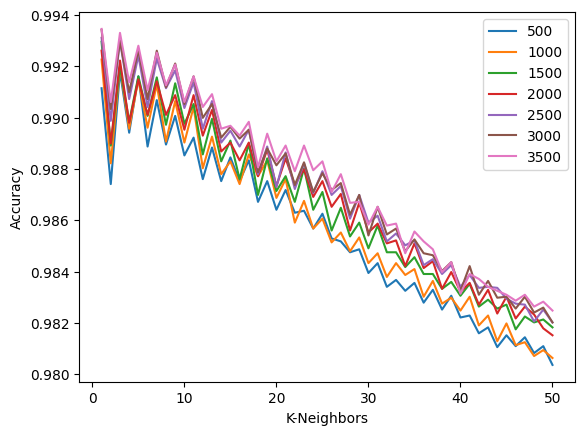

In [12]:
for d in range(500, 4000, 500):
    plt.plot(thresD[str(d)]["x"], thresD[str(d)]["y"], label = str(d))
    
plt.rcParams["figure.figsize"] = (8, 6)  
plt.xlabel("K-Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()